k = 1, Average accuracy: 95.87%
k = 2, Average accuracy: 94.40%
k = 3, Average accuracy: 95.81%
k = 4, Average accuracy: 95.75%
k = 5, Average accuracy: 96.41%
k = 6, Average accuracy: 95.94%
k = 7, Average accuracy: 96.10%
k = 8, Average accuracy: 95.82%
k = 9, Average accuracy: 96.29%
k = 10, Average accuracy: 96.14%
k = 11, Average accuracy: 96.33%
k = 12, Average accuracy: 95.70%
k = 13, Average accuracy: 96.02%
k = 14, Average accuracy: 95.96%
k = 15, Average accuracy: 96.36%
k = 16, Average accuracy: 95.20%
k = 17, Average accuracy: 95.74%
k = 18, Average accuracy: 95.28%
k = 19, Average accuracy: 94.82%
k = 20, Average accuracy: 94.75%


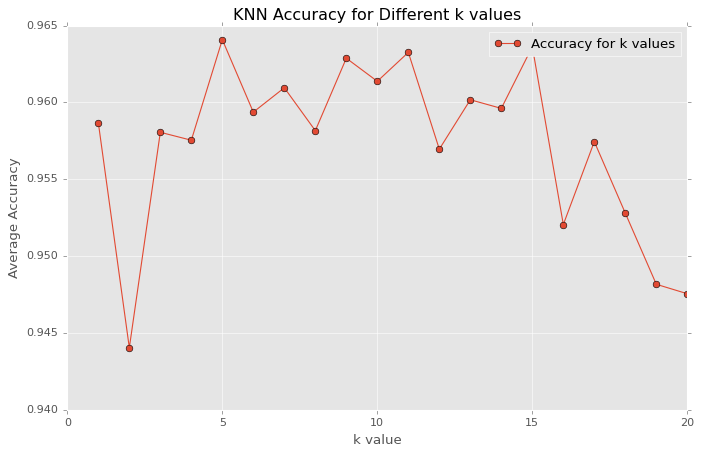

In [22]:
import csv
import random
import numpy
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Enabling inline plotting for Jupyter notebooks
%matplotlib inline

# Setting the plot style
plt.style.use('ggplot')

# Label encoder for Iris dataset labels
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

def load_dataset(file_path, split_ratio, training_set=None, test_set=None):
    if training_set is None:
        training_set = []
    if test_set is None:
        test_set = []
    
    with open(file_path, 'r') as file:
        data_reader = csv.reader(file)
        dataset = list(data_reader)

        for i in range(len(dataset) - 1):
            dataset[i][:4] = [float(feature) for feature in dataset[i][:4]]
            if random.random() < split_ratio:
                training_set.append(dataset[i])
            else:
                test_set.append(dataset[i])

def prepare_data(training_set, test_set):
    train_data = numpy.array(training_set)
    test_data = numpy.array(test_set)

    # Split features and labels
    X_train = numpy.delete(train_data, 4, axis=1)
    y_train = label_encoder.transform(train_data[:, 4])

    X_test = numpy.delete(test_data, 4, axis=1)
    y_test = label_encoder.transform(test_data[:, 4])

    return X_train.astype(numpy.float64), y_train.astype(numpy.float64), X_test.astype(numpy.float64), y_test.astype(numpy.float64)

def run_knn_evaluation(file_path, max_k=20, iterations=100, split_ratio=0.67):
    avg_accuracy = []

    for k in range(1, max_k + 1):
        total_accuracy = 0
        for i in range(iterations):
            # Load and split dataset
            training_set, test_set = [], []
            load_dataset(file_path, split_ratio, training_set, test_set)
            
            # Prepare data for training and testing
            X_train, y_train, X_test, y_test = prepare_data(training_set, test_set)
            
            # KNN Classifier
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train, y_train)
            total_accuracy += knn.score(X_test, y_test)

        avg_accuracy.append(total_accuracy / iterations)
        print(f'k = {k}, Average accuracy: {avg_accuracy[-1] * 100:.2f}%')

    return avg_accuracy

def plot_accuracy(avg_accuracy):
    # Plot the k values from 1 to 20
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 21), avg_accuracy, label="Accuracy for k values", marker='o')
    plt.title("KNN Accuracy for Different k values")
    plt.xlabel("k value")
    plt.ylabel("Average Accuracy")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    iris_file_path = 'iris.data'
    average_accuracy = run_knn_evaluation(iris_file_path)
    plot_accuracy(average_accuracy)
